In [1]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_fragments, global_solution, multi_segmentation, segment_EV
from Single_nuclei_segmentation import Solv, segmented
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.ndimage import gaussian_filter

from cvxopt import matrix

from skimage.measure import regionprops
import numpy as np

5it [00:00, 73.53it/s]


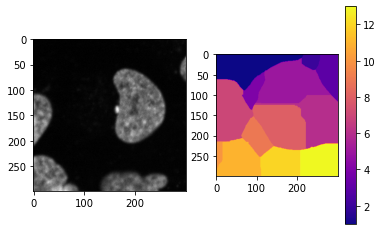

In [2]:
image = plt.imread('../images/dna-images/gnf/dna-0.png')[200:500, 200:500 ,0]
Omega,S = generate_fragments(image,16,0.01,20,2,100)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image,cmap='gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')
plt.colorbar()

In [3]:
Z = list(S)
ListOfImages = create_images(image, Omega, Z)

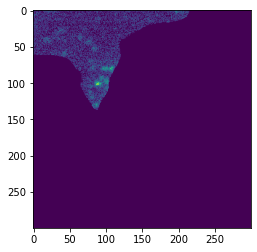

In [4]:
plt.imshow(ListOfImages[1])

In [5]:
theta, f = optimise_fragments(ListOfImages)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done  18 out of  28 | elapsed:  1.9min remaining:  1.1min
[Parallel(n_jobs=-2)]: Done  21 out of  28 | elapsed:  2.3min remaining:   45.3s
[Parallel(n_jobs=-2)]: Done  24 out of  28 | elapsed:  2.4min remaining:   24.0s
[Parallel(n_jobs=-2)]: Done  28 out of  28 | elapsed:  3.1min finished


In [6]:
seg = multi_segmentation(image, Omega, list(S), f, np.median(f), theta)

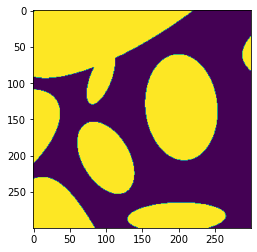

In [7]:
plt.imshow(seg)

In [8]:
u = global_solution(f, np.median(f), Omega, list(S))

In [9]:
np.nonzero(u)

(array([ 0,  7,  8, 16, 20, 24, 25, 27], dtype=int64),)

In [10]:
print(f)

(4527.7244725214905, 21041.956024633688, 32.880613508640145, 10143.35892962061, 9901.387089390037, 6232.839899178572, 200.07174127877593, 11588.99209747774, 553.2229855016232, 3233.8388772402295, 1045.0014425052498, 5952.19433191907, 4246.124126996622, 4246.124128769094, 419.18861631433003, 929.7391829877552, 4611.24367650254, 2467.396475855162, 1443.5927228612775, 450.0444066942238, 1907.3190007924982, 997.3200481655738, 4527.724019932728, 1443.5927229032668, 147.45665841851542, 32.88037789276652, 2803.0344805552913, 1077.1204994779318)


In [11]:
np.array(f)[u == 1]

array([ 4527.72447252, 11588.99209748,   553.2229855 ,  4611.2436765 ,
        1907.31900079,   147.45665842,    32.88037789,  1077.12049948])